NETFLIX DATA ANALYSIS

In [1]:
#Importing necessary libraries
import pandas as pd
import mysql.connector
import sqlite3 as sql

In [2]:
#Making a class to import data from mysql workbench to python
class Main:
    def __init__(self,username,password,host,database,query):
        self.username = username
        self.__password = password
        self.host = host
        self.database = database
        self.df = None
        self.query = query
    def connection(self):
        conn = mysql.connector.connect(user = self.username,host = self.host,password = self.__password,database = self.database)
        cur = conn.cursor()
        self.df = pd.read_sql_query(self.query,conn)
        return self.df

a = Main('root','ashu13579','127.0.0.1','new1',input())
df = a.connection()

 select * from netflix;


C:\Users\delli\AppData\Local\Temp\ipykernel_5640\149876668.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  self.df = pd.read_sql_query(self.query,conn)


In [3]:
#Calling the Database imported
df

,show_id,type,title,director,casts,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,September 25 2021,2020,PG 13,90 min,Documentaries\r
1,s2,TV Show,Blood & Water,,Ama Qamata Khosi Ngema Gail Mabalane Thaban...,South Africa,September 24 2021,2021,TV MA,2 Seasons,International TV Shows TV Dramas TV Mysteries\r
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabi...,,September 24 2021,2021,TV MA,1 Season,Crime TV Shows International TV Shows TV Act...
3,s4,TV Show,Jailbirds New Orleans,,,,September 24 2021,2021,TV MA,1 Season,Docuseries Reality TV\r
4,s5,TV Show,Kota Factory,,Mayur More Jitendra Kumar Ranjan Raj Alam K...,India,September 24 2021,2021,TV MA,2 Seasons,International TV Shows Romantic TV Shows TV ...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,Mark Ruffalo Jake Gyllenhaal Robert Downey J...,United States,November 20 2019,2007,R,158 min,Cult Movies Dramas Thrillers\r
8803,s8804,TV Show,Zombie Dumb,,,,July 1 2019,2018,TV Y7,2 Seasons,Kids TV Korean TV Shows TV Comedies\r
8804,s8805,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg Woody Harrelson Emma Stone ...,United States,November 1 2019,2009,R,88 min,Comedies Horror Movies\r
8805,s8806,Movie,Zoom,Peter Hewitt,Tim Allen Courteney Cox Chevy Chase Kate Ma...,United States,January 11 2020,2006,PG,88 min,Children Family Movies Comedies\r


In [4]:
#Through this we can find the shape of the database
df.shape

(8807, 11)

In [5]:
#We can analyse the no. of counts as per releases
df['release_year'].value_counts().head(5)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64

In [6]:
#Type of content uploaded on netflix
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [7]:
#Showing the first 10 rows of the dataset
df.head(10)

,show_id,type,title,director,casts,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,September 25 2021,2020,PG 13,90 min,Documentaries\r
1,s2,TV Show,Blood & Water,,Ama Qamata Khosi Ngema Gail Mabalane Thaban...,South Africa,September 24 2021,2021,TV MA,2 Seasons,International TV Shows TV Dramas TV Mysteries\r
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabi...,,September 24 2021,2021,TV MA,1 Season,Crime TV Shows International TV Shows TV Act...
3,s4,TV Show,Jailbirds New Orleans,,,,September 24 2021,2021,TV MA,1 Season,Docuseries Reality TV\r
4,s5,TV Show,Kota Factory,,Mayur More Jitendra Kumar Ranjan Raj Alam K...,India,September 24 2021,2021,TV MA,2 Seasons,International TV Shows Romantic TV Shows TV ...
5,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel Zach Gilford Hamish Linklater H...,,September 24 2021,2021,TV MA,1 Season,TV Dramas TV Horror TV Mysteries\r
6,s7,Movie,My Little Pony A New Generation,Robert Cullen José Luis Ucha,Vanessa Hudgens Kimiko Glenn James Marsden ...,,September 24 2021,2021,PG,91 min,Children Family Movies\r
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba Oyafunmike Ogunlano Alexandra D...,United States Ghana Burkina Faso United Kin...,September 24 2021,1993,TV MA,125 min,Dramas Independent Movies International Movi...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc Sue Perkins Mary Berry Paul Ho...,United Kingdom,September 24 2021,2021,TV 14,9 Seasons,British TV Shows Reality TV\r
9,s10,Movie,The Starling,Theodore Melfi,Melissa McCarthy Chris O Dowd Kevin Kline T...,United States,September 24 2021,2021,PG 13,104 min,Comedies Dramas\r


In [8]:
#Countries watching content of netflix
df['country'].value_counts().head(5)

country
United States     2818
India              972
                   831
United Kingdom     419
Japan              245
Name: count, dtype: int64

In [9]:
#Top 5 casts while producing content
df['casts'].value_counts().head(5)

casts
                                                                                           825
David Attenborough                                                                          19
Vatsal Dubey  Julie Tejwani  Rupa Bhimani  Jigna Bhardwaj  Rajesh Kava  Mousam  Swapnil     14
Samuel West                                                                                 10
Jeff Dunham                                                                                  7
Name: count, dtype: int64

In [10]:
#Top N directors
df['director'].value_counts().head(5)

director
                          2634
Rajiv Chilaka               19
Raúl Campos  Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Name: count, dtype: int64

In [11]:
#Performing some manipulations to plot
hr = df[(df['type']=='Movie')][['rating']]

In [12]:
wow = hr['rating'].value_counts().head(5)

In [13]:
he = df[df['type']=='TV Show']

In [14]:
wow2=he['rating'].value_counts().head(5)

In [15]:
df.head(5)

,show_id,type,title,director,casts,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,September 25 2021,2020,PG 13,90 min,Documentaries\r
1,s2,TV Show,Blood & Water,,Ama Qamata Khosi Ngema Gail Mabalane Thaban...,South Africa,September 24 2021,2021,TV MA,2 Seasons,International TV Shows TV Dramas TV Mysteries\r
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabi...,,September 24 2021,2021,TV MA,1 Season,Crime TV Shows International TV Shows TV Act...
3,s4,TV Show,Jailbirds New Orleans,,,,September 24 2021,2021,TV MA,1 Season,Docuseries Reality TV\r
4,s5,TV Show,Kota Factory,,Mayur More Jitendra Kumar Ranjan Raj Alam K...,India,September 24 2021,2021,TV MA,2 Seasons,International TV Shows Romantic TV Shows TV ...


In [16]:
#Top years in which most movies are released
first = df['release_year'].value_counts().head(5)

In [17]:
plt1 = dict(first)

In [18]:
#Importing library for plotting charts
import matplotlib.pyplot as plt

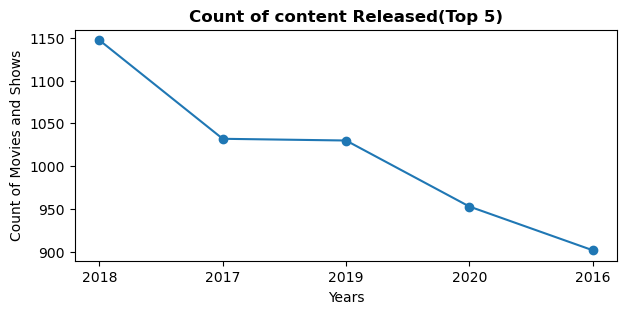

In [19]:
#First plot is a line chart which count of content each year
plt.figure(figsize = (7,3))
plt.plot(plt1.keys(),plt1.values(),marker = 'o')
plt.title("Count of content Released(Top 5)",fontweight = 'bold')
plt.xlabel('Years')
plt.ylabel('Count of Movies and Shows')
plt.show()

In [20]:
new2 = df['type'].value_counts()

In [21]:
plt2 = dict(new2)

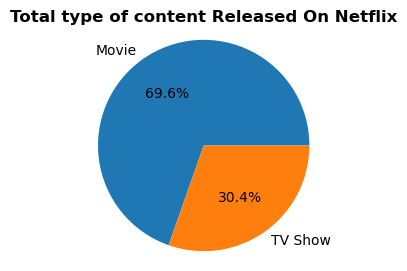

In [22]:
#The second chart is a pie chart showing total type of content released.
plt.figure(figsize = (3,3))
plt.pie(plt2.values(),labels = plt2.keys(),autopct='%1.1f%%')
plt.title('Total type of content Released On Netflix',fontweight = 'bold')
plt.axis('equal')
plt.show()

In [23]:
new3 = df['country'].value_counts().head(5)

In [24]:
plt3 = dict(new3)
plt3['Unknown'] =plt3.pop('')
plt3

{'United States': 2818,
 'India': 972,
 'United Kingdom': 419,
 'Japan': 245,
 'Unknown': 831}

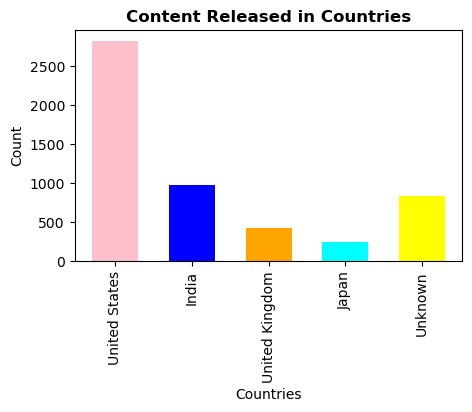

In [25]:
#Bar chart for content released in each country
paint = ['pink','blue','orange','cyan','yellow']
plt.figure(figsize = (5,3))
plt.bar(plt3.keys(),plt3.values(),width = 0.6,color = paint)
plt.title('Content Released in Countries',fontweight = 'bold')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


In [26]:
new4 = df['director'].value_counts().head(5)

In [27]:
plt4 = dict(new4)

In [28]:
plt4['Unknown'] = plt4.pop('')

C:\Users\delli\AppData\Local\Temp\ipykernel_5640\1725334575.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels( plt4.keys(),rotation='vertical' , fontsize=8 )


[Text(0, 0, 'Rajiv Chilaka'),
 Text(1, 0, 'Raúl Campos  Jan Suter'),
 Text(2, 0, 'Suhas Kadav'),
 Text(3, 0, 'Marcus Raboy'),
 Text(4, 0, 'Unknown')]

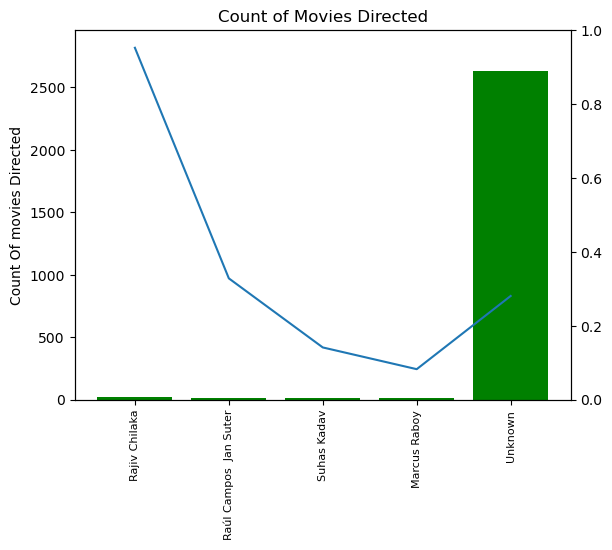

In [50]:
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(plt4.keys(),plt4.values(),color = 'g')
ax1.plot(plt4.keys(),plt3.values())
plt.title("Count of Movies Directed")
ax1.set_ylabel('Count Of movies Directed')
ax1.set_xticklabels( plt4.keys(),rotation='vertical' , fontsize=8 )


In [49]:
plt5 = dict(wow)

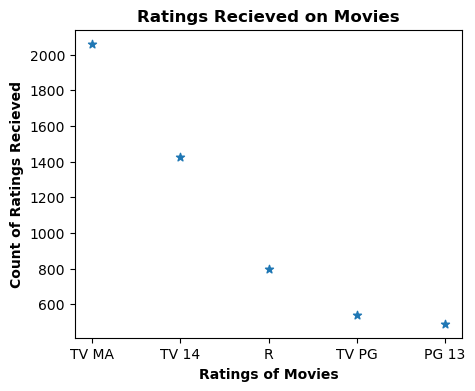

In [50]:
#Plotting a scatter chart for showing the types of ratings recieved on movies
plt.figure(figsize = (5,4))
plt.scatter(plt5.keys(),plt5.values(),marker = '*')
plt.xlabel('Ratings of Movies',fontweight = 'bold')
plt.ylabel('Count of Ratings Recieved',fontweight = 'bold')
plt.title('Ratings Recieved on Movies',fontweight = 'bold')
plt.show()

In [51]:
wow2

rating
TV MA    1145
TV 14     733
TV PG     323
TV Y7     195
TV Y      176
Name: count, dtype: int64

In [52]:
plt6 = dict(wow2)

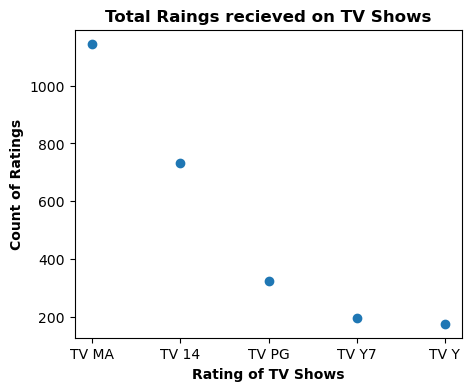

In [54]:
#Ratings recieved on TV shows
plt.figure(figsize = (5,4))
plt.scatter(plt6.keys(),plt6.values(),marker = 'o')
plt.xlabel('Rating of TV Shows',fontweight = 'bold')
plt.ylabel('Count of Ratings',fontweight = 'bold')
plt.title('Total Raings recieved on TV Shows',fontweight = 'bold')
plt.show()

In [55]:
df.shape

(8807, 11)

In [56]:
a = df[df['country']=='United States'][['type','country','rating']]

In [57]:
new7 = a['type'].value_counts()

In [58]:
plt7 = dict(new7)

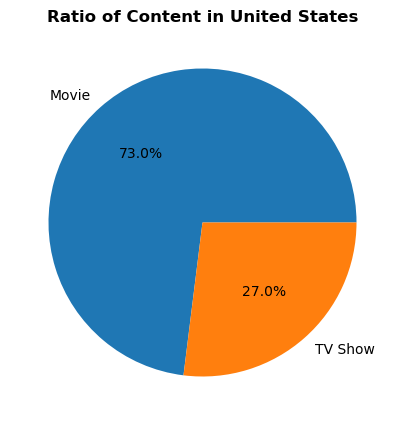

In [59]:
#Plotted a Pie chart for showing ratio of content released in US
plt.figure(figsize = (5,5))
plt.pie(plt7.values(),labels = plt7.keys(),autopct='%1.1f%%')
plt.title('Ratio of Content in United States',fontweight = 'bold')
plt.show()

In [60]:
a

,type,country,rating
0,Movie,United States,PG 13
9,Movie,United States,PG 13
15,TV Show,United States,TV MA
27,Movie,United States,PG 13
28,Movie,United States,PG 13
...,...,...,...
8791,Movie,United States,R
8793,Movie,United States,PG
8802,Movie,United States,R
8804,Movie,United States,R


In [61]:
f = a[a['type']=='Movie'][['rating','type']]

In [62]:
f

,rating,type
0,PG 13,Movie
9,PG 13,Movie
27,PG 13,Movie
28,PG 13,Movie
41,PG,Movie
...,...,...
8791,R,Movie
8793,PG,Movie
8802,R,Movie
8804,R,Movie


In [63]:
new8 = f['rating'].value_counts().head(6)

In [64]:
plt8 = dict(new8)

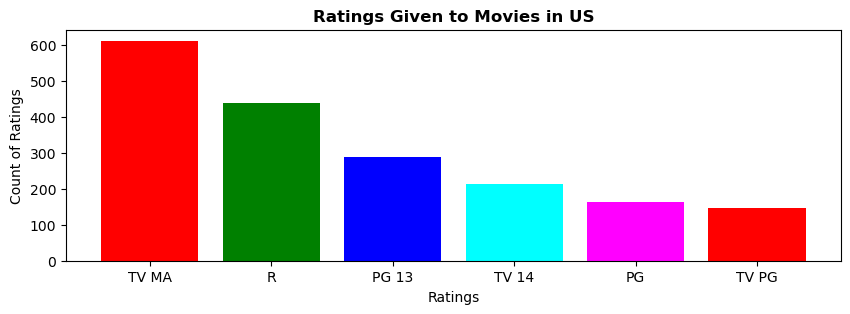

In [65]:
#Ratings given to movies Released in US
paint1 = ['red','green','blue','cyan','magenta']
plt.figure(figsize = (10,3))
plt.bar(plt8.keys(),plt8.values(),color = paint1)
plt.xlabel('Ratings')
plt.ylabel('Count of Ratings')
plt.title('Ratings Given to Movies in US',fontweight = 'bold')
plt.show()

In [66]:
#Done for finding the ratings of tv shows in us
deo = a[a['type']!='Movie'][['rating','type']]

In [67]:
x = deo['rating'].value_counts().head(6)

In [68]:
plt9 = dict(x)

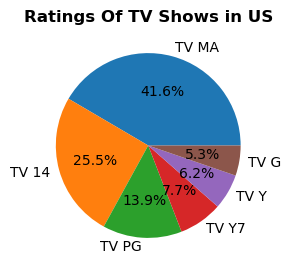

In [69]:
#Plotting a pie chart for finding the percent of ratings given to tv shows
plt.figure(figsize = (10,3))
plt.pie(plt9.values(),labels = plt9.keys(),autopct = '%1.1f%%')
plt.title('Ratings Of TV Shows in US',fontweight = 'bold')
plt.show()

In [70]:
#Done to find the timings of duration people are liking
eo = df[['type','duration','country']]

In [71]:
xy = eo[(eo['duration']>='90 min')&(eo['type']=='Movie')][['type','duration','country']]

In [72]:
xy

,type,duration,country
0,Movie,90 min,United States
6,Movie,91 min,
13,Movie,91 min,
18,Movie,94 min,
28,Movie,97 min,United States
...,...,...,...
8776,Movie,90 min,France Belgium
8781,Movie,96 min,Japan United States
8791,Movie,94 min,United States
8794,Movie,98 min,Egypt France


In [73]:
new10 = xy['country'].value_counts().head(10)

In [74]:
plt10 = dict(new10)

In [75]:
plt10['Unknown'] = plt10.pop('')

In [76]:
plt10

{'United States': 536,
 'India': 63,
 'United Kingdom': 62,
 'Canada': 38,
 'France': 31,
 'Spain': 31,
 'Egypt': 28,
 'Japan': 23,
 'Nigeria': 20,
 'Unknown': 66}

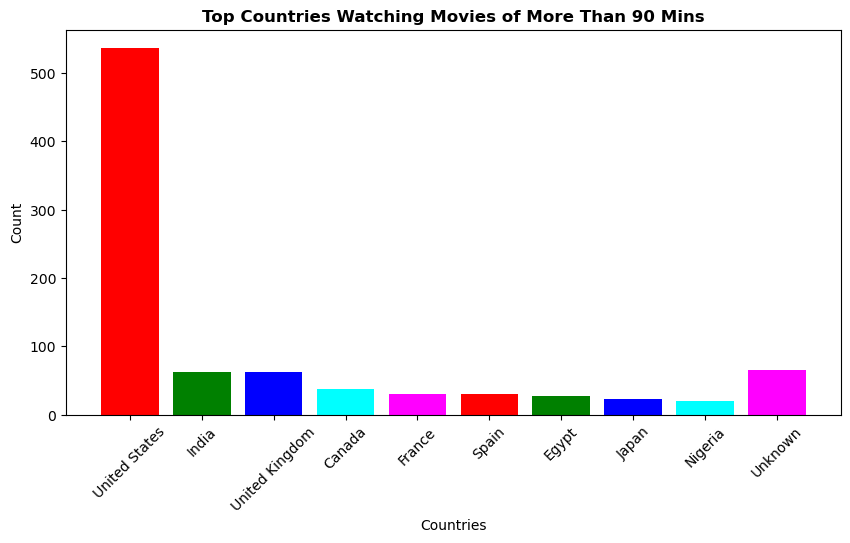

In [78]:
#Plotting a bar chart to find out top countries watching movies of more than 90 mins
plt.figure(figsize = (10,5))
plt.bar(plt10.keys(),plt10.values(),color = paint1)
plt.xticks(rotation = 45)
plt.title('Top Countries Watching Movies of More Than 90 Mins',fontweight = 'bold')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

In [79]:
#Done for finding the seasons of tv shows people of each country are liking
ab = eo[(eo['duration']>='1 Season')&(eo['type']=='TV Show')][['type','duration','country']]

In [80]:
ab

,type,duration,country
1,TV Show,2 Seasons,South Africa
2,TV Show,1 Season,
3,TV Show,1 Season,
4,TV Show,2 Seasons,India
5,TV Show,1 Season,
...,...,...,...
8795,TV Show,2 Seasons,Japan Canada
8796,TV Show,2 Seasons,Turkey
8797,TV Show,3 Seasons,United States France South Korea Indonesia
8800,TV Show,1 Season,Pakistan


In [81]:
new11 = ab['duration'].value_counts().head(6)

In [82]:
plt11 = dict(new11)

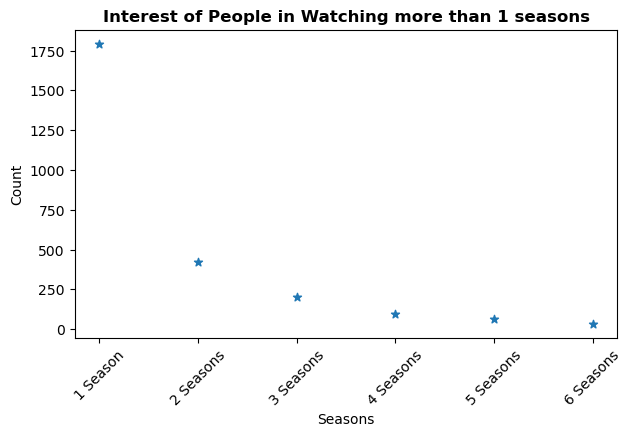

In [84]:
#Plotting a scatter chart for finding the interest of people watching more than 1 season
plt.figure(figsize = (7,4))
plt.scatter(plt11.keys(),plt11.values(),marker = '*')
plt.xticks(rotation = 45)
plt.title('Interest of People in Watching more than 1 seasons',fontweight = 'bold')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

In [85]:
df.head(5)

,show_id,type,title,director,casts,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,September 25 2021,2020,PG 13,90 min,Documentaries\r
1,s2,TV Show,Blood & Water,,Ama Qamata Khosi Ngema Gail Mabalane Thaban...,South Africa,September 24 2021,2021,TV MA,2 Seasons,International TV Shows TV Dramas TV Mysteries\r
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabi...,,September 24 2021,2021,TV MA,1 Season,Crime TV Shows International TV Shows TV Act...
3,s4,TV Show,Jailbirds New Orleans,,,,September 24 2021,2021,TV MA,1 Season,Docuseries Reality TV\r
4,s5,TV Show,Kota Factory,,Mayur More Jitendra Kumar Ranjan Raj Alam K...,India,September 24 2021,2021,TV MA,2 Seasons,International TV Shows Romantic TV Shows TV ...


In [101]:
pd = df.pivot_table(df,index = 'country',columns = df['type'],aggfunc = 'count',fill_value = 0)

In [103]:
pd.head(5)

casts         date_added  \
type                                               Movie TV Show      Movie   
country                                                                       
                                                     440     391        440   
  France  Algeria                                      1       0          1   
  South Korea                                          0       1          0   
Argentina                                             38      18         38   
Argentina  Brazil  France  Poland  Germany  Den...     1       0          1   

                                                           director          \
type                                               TV Show    Movie TV Show   
country                                                                       
                                                       391      440     391   
  France  Algeria                                        0        1       0   
  South Korea                                            1        0       1   
Argentina                                               18       38      18   
Argentina  Brazil  France  Poland  Germany  Den...       0        1       0   

                                                   duration         listed_in  \
type                                                  Movie TV Show     Movie   
country                                                                         
                                                        440     391       440   
  France  Algeria                                         1       0         1   
  South Korea                                             0       1         0   
Argentina                                                38      18        38   
Argentina  Brazil  France  Poland  Germany  Den...        1       0         1   

                                                           rating          \
type                                               TV Show  Movie TV Show   
country                                                                     
                                                       391    440     391   
  France  Algeria                                        0      1       0   
  South Korea                                            1      0       1   
Argentina                                               18     38      18   
Argentina  Brazil  France  Poland  Germany  Den...       0      1       0   

                                                   release_year          \
type                                                      Movie TV Show   
country                                                                   
                                                            440     391   
  France  Algeria                                             1       0   
  South Korea                                                 0       1   
Argentina                                                    38      18   
Argentina  Brazil  France  Poland  Germany  Den...            1       0   

                                                   show_id         title  \
type                                                 Movie TV Show Movie   
country                                                                    
                                                       440     391   440   
  France  Algeria                                        1       0     1   
  South Korea                                            0       1     0   
Argentina                                               38      18    38   
Argentina  Brazil  France  Poland  Germany  Den...       1       0     1   

                                                            
type                                               TV Show  
country                                                     
                                                       391  
  France  Algeria                                        0  
  So